# Raiz De Un Polinomio

* Mediante Algoritmos Genéticos encontramos la raíz real del polinomio P(x) = (5x^5) - (3x^4) - (x^3) - (5x^2) - (x) - 3 en el intervalo [0.5, 1], usando números reales, una población de 100 listas, un tipo de cruce por posicion y  selección por clasificación.

* Para el intervalo [0.5, 1] el polinomio dado no tiene raiz por lo que el programa devuelve un valor lejano a la raiz.


* Para el intervalo [1, 2] el polinomio dado tiene raiz por lo que el programa devuelve un valor cercano a la raiz

* Dibujamos un cuadro de aptitud contra generación.  

In [3]:
import random

# Definimos el polinomio P(x)
def P(x):
    return 5*x**5 - 3*x**4 - x**3 - 5*x**2 - x - 3

# Función para inicializar la población
def inicializar_poblacion(tamano_poblacion):
    poblacion = []
    for _ in range(tamano_poblacion):
        x = random.uniform(1, 2)
        poblacion.append(x)
    return poblacion

# Función de clasificación basada en la diferencia absoluta
def clasificar_poblacion(poblacion):
    clasificacion = [(x, abs(P(x))) for x in poblacion]
    clasificacion.sort(key=lambda x: x[1])
    return [x[0] for x in clasificacion]

# Función de cruce por posición
def cruce_por_posicion(padre1, padre2):
    punto_cruce = random.randint(1, 4)
    hijo1 = padre1 if random.random() < 0.5 else padre2
    hijo2 = padre2 if hijo1 == padre1 else padre1
    return hijo1, hijo2

# Algoritmo genético para encontrar la raíz
def algoritmo_genetico(tamano_poblacion, num_generaciones):
    poblacion = inicializar_poblacion(tamano_poblacion)

    for _ in range(num_generaciones):
        poblacion = clasificar_poblacion(poblacion)
        nueva_generacion = []

        # Elitismo: mantenemos al mejor individuo de la generación anterior
        nueva_generacion.append(poblacion[0])

        # Cruce y mutación
        while len(nueva_generacion) < tamano_poblacion:
            padre1 = random.choice(poblacion)
            padre2 = random.choice(poblacion)
            hijo1, hijo2 = cruce_por_posicion(padre1, padre2)
            nueva_generacion.extend([hijo1, hijo2])

        poblacion = nueva_generacion

    # Devolvemos el mejor individuo de la última generación
    return clasificar_poblacion(poblacion)[0]

# Parámetros del Algoritmo Genético
tamano_poblacion = 100
num_generaciones = 5000

# Ejecutamos el Algoritmo Genético
mejor_individuo = algoritmo_genetico(tamano_poblacion, num_generaciones)

print(f"La raíz aproximada es: {mejor_individuo}")


La raíz aproximada es: 1.435984116133486


# Verificación Raiz Del Polinomio

In [4]:
def P(x):
    return 5*x**5 - 3*x**4 - x**3 - 5*x**2 - x - 3

print(P(1.435984116133486))

0.06593111288811038


# Generador De Dieta

Teniendo una lista de 15 alimentos con sus respectivo número de calorías, gramos de proteína, gramos de grasa y gramos de carbohidratos. Generamos una dieta para un individuo que debe consumir una determinada cantidad de calorías, proteínas, grasa y carbohidratos.

In [ ]:
import random

# Definición de alimentos (nombre, calorías, proteínas, grasas, carbohidratos)
alimentos = [
    ("Huevo", 68, 5.5, 4.8, 0.6),
    ("Pollo", 165, 31, 3.6, 0),
    ("Arroz", 130, 2.7, 0.3, 28),
    ("Pasta", 131, 5.5, 0.5, 25),
    ("Leche", 42, 3.4, 1, 4.8),
    ("Atún", 128, 26, 1, 0),
    ("Plátano", 105, 1.3, 0.3, 27),
    ("Manzana", 95, 0.5, 0.3, 25),
    ("Brócoli", 55, 3.7, 0.6, 11),
    ("Zanahoria", 41, 0.9, 0.2, 10),
    ("Nuez", 185, 4.3, 18.5, 3.9),
    ("Aguacate", 160, 2, 14.7, 8.5),
    ("Pan Integral", 69, 3.6, 0.9, 11.8),
    ("Papa", 130, 2, 0.2, 30),
    ("Salmón", 206, 22, 13.5, 0),
]

# Requisitos diarios del individuo (calorías, proteínas, grasas, carbohidratos)
requisitos = (2000, 150, 70, 300)

# Número de individuos en la población
num_individuos = 100

# Número máximo de generaciones
num_generaciones = 100

# Tamaño del torneo para selección de padres
tamano_torneo = 5

# Probabilidad de mutación
prob_mutacion = 0.2

def fitness(solucion, requisitos):
    """
    Calcula la aptitud de una solución dada.
    """
    calorias_consumidas = sum(a[1]*cantidad for a, cantidad in zip(alimentos, solucion))
    proteinas_consumidas = sum(a[2]*cantidad for a, cantidad in zip(alimentos, solucion))
    grasas_consumidas = sum(a[3]*cantidad for a, cantidad in zip(alimentos, solucion))
    carbohidratos_consumidos = sum(a[4]*cantidad for a, cantidad in zip(alimentos, solucion))

    diferencia_calorias = abs(calorias_consumidas - requisitos[0])
    diferencia_proteinas = abs(proteinas_consumidas - requisitos[1])
    diferencia_grasas = abs(grasas_consumidas - requisitos[2])
    diferencia_carbohidratos = abs(carbohidratos_consumidos - requisitos[3])

    return 1 / (1 + diferencia_calorias + diferencia_proteinas + diferencia_grasas + diferencia_carbohidratos)

def inicializar_poblacion(num_individuos):
    """
    Inicializa una población de individuos con soluciones aleatorias.
    """
    return [[random.randint(0, 10) for _ in range(len(alimentos))] for _ in range(num_individuos)]

def seleccionar_padres(poblacion):
    """
    Selecciona padres utilizando el método de torneo.
    """
    padres = []
    for _ in range(len(poblacion)):
        torneo = random.sample(poblacion, tamano_torneo)
        padres.append(max(torneo, key=lambda x: fitness(x, requisitos)))
    return padres

def cruzar(padre1, padre2):
    """
    Realiza el cruce de dos padres para producir un hijo.
    """
    punto_cruce = random.randint(0, len(padre1) - 1)
    hijo = padre1[:punto_cruce] + padre2[punto_cruce:]
    return hijo

def mutar(solucion):
    """
    Realiza una mutación en la solución.
    """
    if random.random() < prob_mutacion:
        gen_a_mutar = random.randint(0, len(solucion) - 1)
        solucion[gen_a_mutar] = random.randint(0, 10)

def generar_dieta():
    """
    Genera una dieta que cumple con los requisitos.
    """
    poblacion = inicializar_poblacion(num_individuos)

    for _ in range(num_generaciones):
        padres = seleccionar_padres(poblacion)

        nueva_poblacion = []
        for i in range(0, len(padres), 2):
            hijo1 = cruzar(padres[i], padres[i + 1])
            hijo2 = cruzar(padres[i + 1], padres[i])
            mutar(hijo1)
            mutar(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion

    mejor_solucion = max(poblacion, key=lambda x: fitness(x, requisitos))

    return [(alimentos[i][0], mejor_solucion[i]) for i in range(len(alimentos))]

# Generar la dieta
dieta_generada = generar_dieta()
print("Dieta generada:")
for alimento, cantidad in dieta_generada:
    print(f"{alimento}: {cantidad} porciones")


Dieta generada:
Huevo: 2 porciones
Pollo: 0 porciones
Arroz: 2 porciones
Pasta: 0 porciones
Leche: 2 porciones
Atún: 2 porciones
Plátano: 3 porciones
Manzana: 0 porciones
Brócoli: 3 porciones
Zanahoria: 4 porciones
Nuez: 0 porciones
Aguacate: 0 porciones
Pan Integral: 6 porciones
Papa: 0 porciones
Salmón: 1 porciones


# Despacho De Energia

Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía por cada GW entre plantas y ciudades se dan en la siguiente tabla:

|  | Cali | Bogota | Medellin | Barranquilla
|---|---|---|---|---
| Planta Cali | 1 | 4 | 3 | 6
| Planta Bogotá| 4 | 1 | 4 | 5
| Planta Medellin | 3 | 4 | 1 | 4
| Planta Barranquilla | 6 | 5 | 4 | 1

Los costos del KW-H por generador se dan en la siguiente tabla:

| Generador | Costo |
|---|---|
| Planta C | 680 |
| Planta B | 720 |
| Planta M | 660 |
| Planta B | 750 |

Utilizando Algoritmos Geneticos encontramos el mejor despacho de energía minimizando los costos de transporte y generación.

In [ ]:
import random

# Definir datos del problema
plantas = ['Cali', 'Bogotá', 'Medellín', 'Barranquilla']
ciudades = ['Cali', 'Bogotá', 'Medellín', 'Barranquilla']
capacidades = [3, 6, 5, 4]
demandas = [4, 3, 5, 3]
transporte = [[1, 4, 3, 6], [4, 1, 4, 5], [3, 4, 1, 4], [6, 5, 4, 1]]
costos_generacion = {'Cali': 680, 'Bogotá': 720, 'Medellín': 660, 'Barranquilla': 750}

# Definir funciones auxiliares
def costo_total(asignacion):
    costo_transporte = 0
    costo_generacion = 0
    for i in range(len(asignacion)):
        planta = asignacion[i]
        ciudad = ciudades[i]
        costo_transporte += transporte[plantas.index(planta)][ciudades.index(ciudad)]
        costo_generacion += capacidades[plantas.index(planta)] * costos_generacion[planta]
    return costo_transporte + costo_generacion

def generar_poblacion_inicial(tamano_poblacion):
    poblacion = []
    for _ in range(tamano_poblacion):
        individuo = [random.choice(plantas) for _ in range(len(ciudades))]
        poblacion.append(individuo)
    return poblacion

def seleccion(poblacion):
    return min(poblacion, key=costo_total)

def cruce(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    descendiente1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    descendiente2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return descendiente1, descendiente2

def mutacion(individuo, probabilidad_mutacion):
    for i in range(len(individuo)):
        if random.random() < probabilidad_mutacion:
            individuo[i] = random.choice(plantas)
    return individuo

# Definir parámetros del algoritmo
tamano_poblacion = 100
probabilidad_mutacion = 0.1
num_generaciones = 1000

# Inicializar población
poblacion = generar_poblacion_inicial(tamano_poblacion)

# Ciclo de optimización
for _ in range(num_generaciones):
    poblacion = sorted(poblacion, key=costo_total)[:tamano_poblacion]
    padre1 = seleccion(poblacion)
    padre2 = seleccion(poblacion)
    descendiente1, descendiente2 = cruce(padre1, padre2)
    descendiente1 = mutacion(descendiente1, probabilidad_mutacion)
    descendiente2 = mutacion(descendiente2, probabilidad_mutacion)
    poblacion.extend([descendiente1, descendiente2])

# Obtener la mejor asignación
mejor_asignacion = seleccion(poblacion)
mejor_costo = costo_total(mejor_asignacion)

print("Mejor asignación de generadores a ciudades:")
for i in range(len(ciudades)):
    print(f"{ciudades[i]} -> {mejor_asignacion[i]}")
print(f"Costo total: {mejor_costo}")


Mejor asignación de generadores a ciudades:
Cali -> Cali
Bogotá -> Cali
Medellín -> Cali
Barranquilla -> Cali
Costo total: 8174


# Traveling Salesman Problem

## Selección Por Ruleta

In [26]:
# Imports
import numpy as np
import random
import time

from datetime import datetime


# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3


# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict


# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set


def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total


def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list


def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]


    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]


def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]


def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]


tiempos_seleccion_ruleta = []

for generation in range(1000, 10001, 1000):
  # print(generation)

  inicio = time.perf_counter()

  best_solution = [-1,np.inf,np.array([])]
  for i in range(generation):
      # if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
      fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

      #Saving the best solution
      if fitnes_list.min() < best_solution[1]:
          best_solution[0] = i
          best_solution[1] = fitnes_list.min()
          best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

      progenitor_list = progenitor_selection(population_set,fitnes_list)
      new_population_set = mate_population(progenitor_list)

      mutated_pop = mutate_population(new_population_set)

  fin = time.perf_counter()

  tiempo_ejecucion = fin - inicio

  # print(f"El tiempo de ejecución fue de {tiempo_ejecucion} segundos.")

  tiempos_seleccion_ruleta += [[generation, tiempo_ejecucion]]

  best_solution

# print(tiempos_seleccion_ruleta)



## Selección Por Torneo

In [27]:
# Imports
import numpy as np
import random

from datetime import datetime


# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3


# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict


# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set


def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total


def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list


def progenitor_selection(population_set, fitnes_list):
    progenitor_list_a = []
    progenitor_list_b = []

    for _ in range(len(population_set)):
        # Seleccionar dos individuos aleatorios para el torneo
        tournament_a = random.choice(range(len(population_set)))
        tournament_b = random.choice(range(len(population_set)))

        # Seleccionar el individuo con mejor aptitud en el torneo
        if fitnes_list[tournament_a] < fitnes_list[tournament_b]:
            progenitor_list_a.append(population_set[tournament_a])
        else:
            progenitor_list_a.append(population_set[tournament_b])

        tournament_c = random.choice(range(len(population_set)))
        tournament_d = random.choice(range(len(population_set)))

        if fitnes_list[tournament_c] < fitnes_list[tournament_d]:
            progenitor_list_b.append(population_set[tournament_c])
        else:
            progenitor_list_b.append(population_set[tournament_d])

    progenitor_list_a = np.array(progenitor_list_a)
    progenitor_list_b = np.array(progenitor_list_b)

    return np.array([progenitor_list_a, progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]


def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring


def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]


def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]


tiempos_seleccion_torneo = []

for generation in range(1000, 10001, 1000):
  # print(generation)

  inicio = time.perf_counter()

  best_solution = [-1,np.inf,np.array([])]
  for i in range(generation):
      # if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
      fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

      #Saving the best solution
      if fitnes_list.min() < best_solution[1]:
          best_solution[0] = i
          best_solution[1] = fitnes_list.min()
          best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

      progenitor_list = progenitor_selection(population_set,fitnes_list)
      new_population_set = mate_population(progenitor_list)

      mutated_pop = mutate_population(new_population_set)

  fin = time.perf_counter()

  tiempo_ejecucion = fin - inicio

  # print(f"El tiempo de ejecución fue de {tiempo_ejecucion} segundos.")

  tiempos_seleccion_torneo += [[generation, tiempo_ejecucion]]

  best_solution

# print(tiempos_seleccion_torneo)

## Selección Por Ranking

In [28]:
# Imports
import numpy as np
import random

from datetime import datetime


# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3


# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict


# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set


def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total


def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list


def progenitor_selection(population_set, fitnes_list):
    # Generar una lista de índices ordenados por aptitud (en orden ascendente)
    ranked_indices = np.argsort(fitnes_list)

    # Asignar probabilidades según el rango
    rank_probabilities = np.arange(1, n_population + 1)

    # Calcular la suma total de probabilidades
    total_prob = rank_probabilities.sum()

    # Normalizar las probabilidades
    rank_probabilities = rank_probabilities / total_prob

    # Seleccionar progenitores utilizando selección por ranking
    progenitor_list_a = np.random.choice(ranked_indices, n_population, p=rank_probabilities)
    progenitor_list_b = np.random.choice(ranked_indices, n_population, p=rank_probabilities)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]

    return np.array([progenitor_list_a, progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]


def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]


def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]


tiempos_seleccion_ranking = []

for generation in range(1000, 10001, 1000):
  # print(generation)

  inicio = time.perf_counter()

  best_solution = [-1,np.inf,np.array([])]
  for i in range(generation):
      # if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
      fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

      #Saving the best solution
      if fitnes_list.min() < best_solution[1]:
          best_solution[0] = i
          best_solution[1] = fitnes_list.min()
          best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

      progenitor_list = progenitor_selection(population_set,fitnes_list)
      new_population_set = mate_population(progenitor_list)

      mutated_pop = mutate_population(new_population_set)

  fin = time.perf_counter()

  tiempo_ejecucion = fin - inicio

  # print(f"El tiempo de ejecución fue de {tiempo_ejecucion} segundos.")

  tiempos_seleccion_ranking += [[generation, tiempo_ejecucion]]

  best_solution

# print(tiempos_seleccion_ranking)

# Gráfica Comparativa De Tiempos Por Tipo De Selección

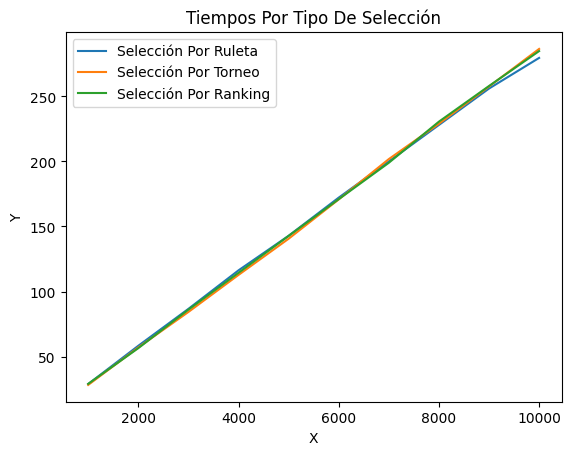

In [29]:
import matplotlib.pyplot as plt

# Extraer los valores de x y y para cada lista
x1, y1 = zip(*tiempos_seleccion_ruleta)
x2, y2 = zip(*tiempos_seleccion_torneo)
x3, y3 = zip(*tiempos_seleccion_ranking)

# Graficar las listas
plt.plot(x1, y1, label='Selección Por Ruleta')
plt.plot(x2, y2, label='Selección Por Torneo')
plt.plot(x3, y3, label='Selección Por Ranking')

# Agregar etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tiempos Por Tipo De Selección')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## Gráfica comparativa de tiempos por tipo de selección entre selección por ruleta, selección por torneo y selección por ranking con variacion desde 1000 genraciones hasta 10000 genraciones cada 1000 generaciones
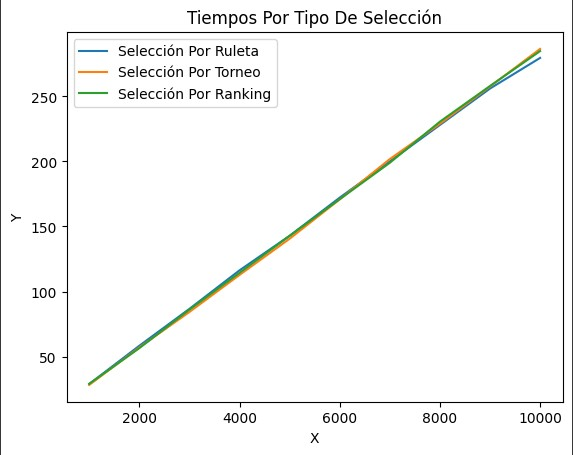